## Deutsch's Query Algorithm

### Input: A function `f` from `S -> S` where `S = {0, 1}`

### Output: A single bit denoting the whether `f` is constant or balanced (ie no. of 0s  = no. of 1s in the `range(f)`)

Answer: 1


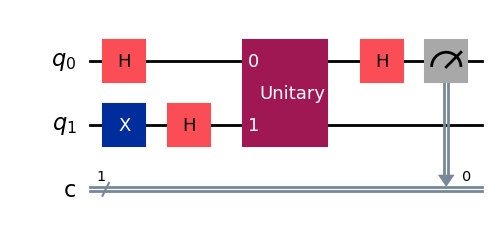

In [12]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit_aer.primitives import Sampler
import numpy as np



sampler = Sampler()
# function:
# if the function is constant the output is 0, else if it is balanced 1
f = [1, 0]

basis = [[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]]

matrix = [basis[2*f[0]], basis[2*f[1] + 1], basis[2*(1 - f[0])], basis[2*(1 - f[1]) + 1]]
# linear transformation corresponding to the query

op_f = qi.Operator( np.transpose(np.array(matrix)) )

qc = QuantumCircuit(2, 1)
# default all initialized to 0 state
# preparing the second qbit in the 1 state
qc.x(1)

qc.h(0)
qc.h(1) # setting up a '-' state

qc.unitary(op_f, [0, 1])

qc.h(0)

qc.measure(0, 0)
result = sampler.run(qc, shots=1).result()
# print(result)
statistics = result.quasi_dists[0].binary_probabilities()
# print(statistics)
bits = list(statistics.keys())[0]
print("Answer:",bits)
qc.draw("mpl")


